<a href="https://colab.research.google.com/github/DebaratiD/Machine-Learning/blob/main/MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow-datasets tensorflow

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt


In [3]:
ds_train, ds_val, ds_test = tfds.load('mnist', split=['train[:75%]', 'train[75%:]', 'test'],shuffle_files=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
ds_train = ds_train.shuffle(1024).prefetch(tf.data.AUTOTUNE)
ds_val = ds_val.shuffle(1024).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.shuffle(1024).prefetch(tf.data.AUTOTUNE)

In [5]:
print(len(ds_test))

10000


We loaded the mnist dataset from tensorflow using the tensorflow_datasets package installed first. This may give some issue in VSCode since long paths are not supported in Windows often.

We use `tfds.load()` to easily load MNIST data from the tensorflow datasets and use splitting and slicing to separate the dataset into training, validation and test datasets of 75%, 25% and remaining test data respectively.

`shuffle()` and `batch()` help randomly shuffle our data and packs them in batches of 32 records each. Using prefetch configures the data to optimise performance I believe.

In [6]:
print(ds_train.take(0))

<_TakeDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [7]:
print(type(ds_train.take(0)))

<class 'tensorflow.python.data.ops.take_op._TakeDataset'>


So, ds_train is a type of dataset that has a function called `take()`. The number specified in `take()` is the number of batches that will be taken. The entire batch is grouped into a single dictionary with 2 keys: **image** and **label**. The **image** key contains a tensorflow object of 32 images, while the **label** key contains an array of 32 integers which are the respective labels of each image.

After playing with the data, I removed the `batch()` to extract records seamlessly, then use batches while fitting data.

In [8]:
ex = ds_train.take(1)
for im in ex:
  print('Image: ', im["image"], 'Label: ', im['label'])

# plt.figure()
# plt.imshow(ex['image'])
# plt.xlabel(ex['label'])
# plt.show()

Image:  tf.Tensor(
[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  

In [9]:
ex = ds_train.take(3)
for im in ex:
  print('Image: ', im["image"], 'Label: ', im['label'])

Image:  tf.Tensor(
[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  

In [10]:
obj = ds_train.take(1)
for i in obj:
  image,label = i["image"], i["label"]

In [11]:
print(image.shape)

(28, 28, 1)


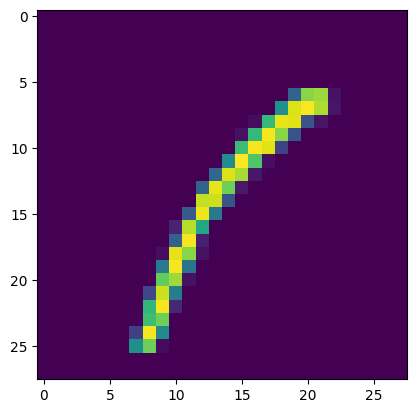

In [12]:
plt.imshow(image)

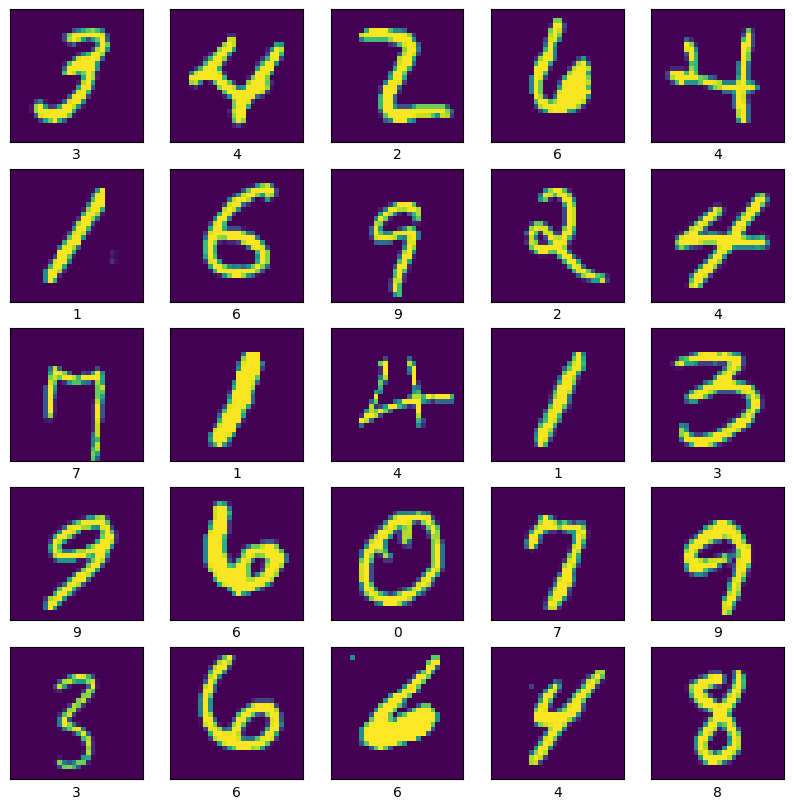

In [13]:
plt.figure(figsize=(10,10))
rec = ds_train.take(25)
ind = 1
for i in rec:
  plt.subplot(5,5,ind)
  plt.imshow(i["image"])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(np.array(i["label"]))
  ind+=1
#plt.colorbar()
plt.show()

## Defining and training our models

In [14]:
# build 2 models: one dense and one cnn

modelDense = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(10)
])

modelCnn = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [15]:
modelDense.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
modelCnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
train_images = np.array(ds_train.map(lambda x: x["image"]))

In [17]:
def extract_image_and_labels(dataset):
  all_data = dataset.take(len(dataset))
  images = []
  labels = []
  for i in all_data:
    images.append(np.squeeze(i["image"].numpy()))
    labels.append(i["label"].numpy())


  images = np.array(images).reshape(len(images),28,28,1)
  labels = np.array(labels).reshape(len(labels),1)
  return images, labels

In [19]:
train_images, train_labels = extract_image_and_labels(ds_train)
val_images, val_labels = extract_image_and_labels(ds_val)
test_images, test_labels = extract_image_and_labels(ds_test)

In [20]:
print(len(train_images), len(val_images), test_images.shape)

45000 15000 (10000, 28, 28, 1)


In [21]:
modelDense.fit(train_images, train_labels,
               batch_size = 32, epochs = 10, validation_data=(val_images, val_labels))

Epoch 1/10
1407/1407 [==============================] - 11s 4ms/step - loss: 2.3471 - accuracy: 0.2210 - val_loss: 2.3047 - val_accuracy: 0.1565
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 2.3030 - accuracy: 0.1547 - val_loss: 2.3033 - val_accuracy: 0.1423
Epoch 3/10
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3025 - accuracy: 0.1415 - val_loss: 2.3033 - val_accuracy: 0.1423
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 2.3025 - accuracy: 0.1415 - val_loss: 2.3033 - val_accuracy: 0.1423
Epoch 5/10
1407/1407 [==============================] - 5s 4ms/step - loss: 2.3025 - accuracy: 0.1415 - val_loss: 2.3033 - val_accuracy: 0.1423
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3025 - accuracy: 0.1415 - val_loss: 2.3033 - val_accuracy: 0.1423
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3025 - accuracy: 0.1415 - val_loss: 2.3033 - val_accuracy

In [22]:
modelCnn.fit(train_images, train_labels,
               batch_size = 32, epochs = 10, validation_data=(val_images, val_labels))

Epoch 1/10
1407/1407 [==============================] - 10s 5ms/step - loss: 2.3576 - accuracy: 0.1841 - val_loss: 2.3026 - val_accuracy: 0.1795
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3026 - accuracy: 0.1785 - val_loss: 2.3026 - val_accuracy: 0.1795
Epoch 3/10
1407/1407 [==============================] - 7s 5ms/step - loss: 2.3026 - accuracy: 0.1785 - val_loss: 2.3026 - val_accuracy: 0.1795
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3026 - accuracy: 0.1785 - val_loss: 2.3026 - val_accuracy: 0.1795
Epoch 5/10
1407/1407 [==============================] - 7s 5ms/step - loss: 2.3026 - accuracy: 0.1785 - val_loss: 2.3026 - val_accuracy: 0.1795
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3026 - accuracy: 0.1785 - val_loss: 2.3026 - val_accuracy: 0.1795
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 2.3026 - accuracy: 0.1785 - val_loss: 2.3026 - val_accuracy

In [23]:
loss, acc = modelDense.evaluate(test_images, test_labels)
print("Accuracy", acc)

313/313 [==============================] - 1s 2ms/step - loss: 2.2867 - accuracy: 0.2192
Accuracy 0.219200000166893


In [24]:
loss, acc = modelCnn.evaluate(test_images, test_labels)
print("Accuracy", acc)

313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1795
Accuracy 0.17949999868869781


In [25]:
# def configure_for_performance(ds):
#   ds = ds.cache()
#   ds = ds.shuffle(buffer_size=1000)
#   ds = ds.batch(32)
#   ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
#   return ds

In [26]:
modelCnn2 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [27]:
modelCnn2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
modelCnn2.fit(train_images, train_labels,
               batch_size = 32, epochs = 20, validation_data=(val_images, val_labels))

Epoch 1/20
1407/1407 [==============================] - 14s 8ms/step - loss: 2.5355 - accuracy: 0.1503 - val_loss: 2.3026 - val_accuracy: 0.1412
Epoch 2/20
1407/1407 [==============================] - 11s 7ms/step - loss: 2.3026 - accuracy: 0.1410 - val_loss: 2.3026 - val_accuracy: 0.1412
Epoch 3/20
1407/1407 [==============================] - 11s 7ms/step - loss: 2.3026 - accuracy: 0.1410 - val_loss: 2.3026 - val_accuracy: 0.1412
Epoch 4/20
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3026 - accuracy: 0.1414 - val_loss: 2.3026 - val_accuracy: 0.1412
Epoch 5/20
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3026 - accuracy: 0.1414 - val_loss: 2.3026 - val_accuracy: 0.1412
Epoch 6/20
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3026 - accuracy: 0.1407 - val_loss: 2.3026 - val_accuracy: 0.1412
Epoch 7/20
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3026 - accuracy: 0.1415 - val_loss: 2.3026 - val_ac

In [29]:
loss, accuracy = modelCnn2.evaluate(test_images, test_labels)
print("Accuracy: ", f"{accuracy*100}%")

313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1374
Accuracy:  13.740000128746033%


This model with more layers performs even worse.